In [6]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [7]:
M={}
M[0]=np.load('outputs/prior_conc.npy')
M[1]=np.load('outputs/cov_conc.npy')

In [17]:
titles={}
titles[0]=["Experiment 1\n\nTotal Shift $(P_{\mathbf{X},Y})$","Cond. Shift 1 $(P_{\mathbf{X}|Y})$", "Response Shift $(P_{Y})$"]
titles[1]=["Experiment 2\n\nTotal Shift $(P_{\mathbf{X},Y})$","Cond. Shift 2 $(P_{Y|\mathbf{X}})$", "Feature Shift $(P_{\mathbf{X}})$"]

In [18]:
values={}
values[0] = np.round(np.arange(-.12,.12,.01)+.005,2)
values[1] = np.arange(-.24,.24,.02) +.01

In [19]:
axislab={}
axislab[0]=["$\delta$","$\gamma$"]
axislab[1]=["$\lambda$","$\Theta$"]

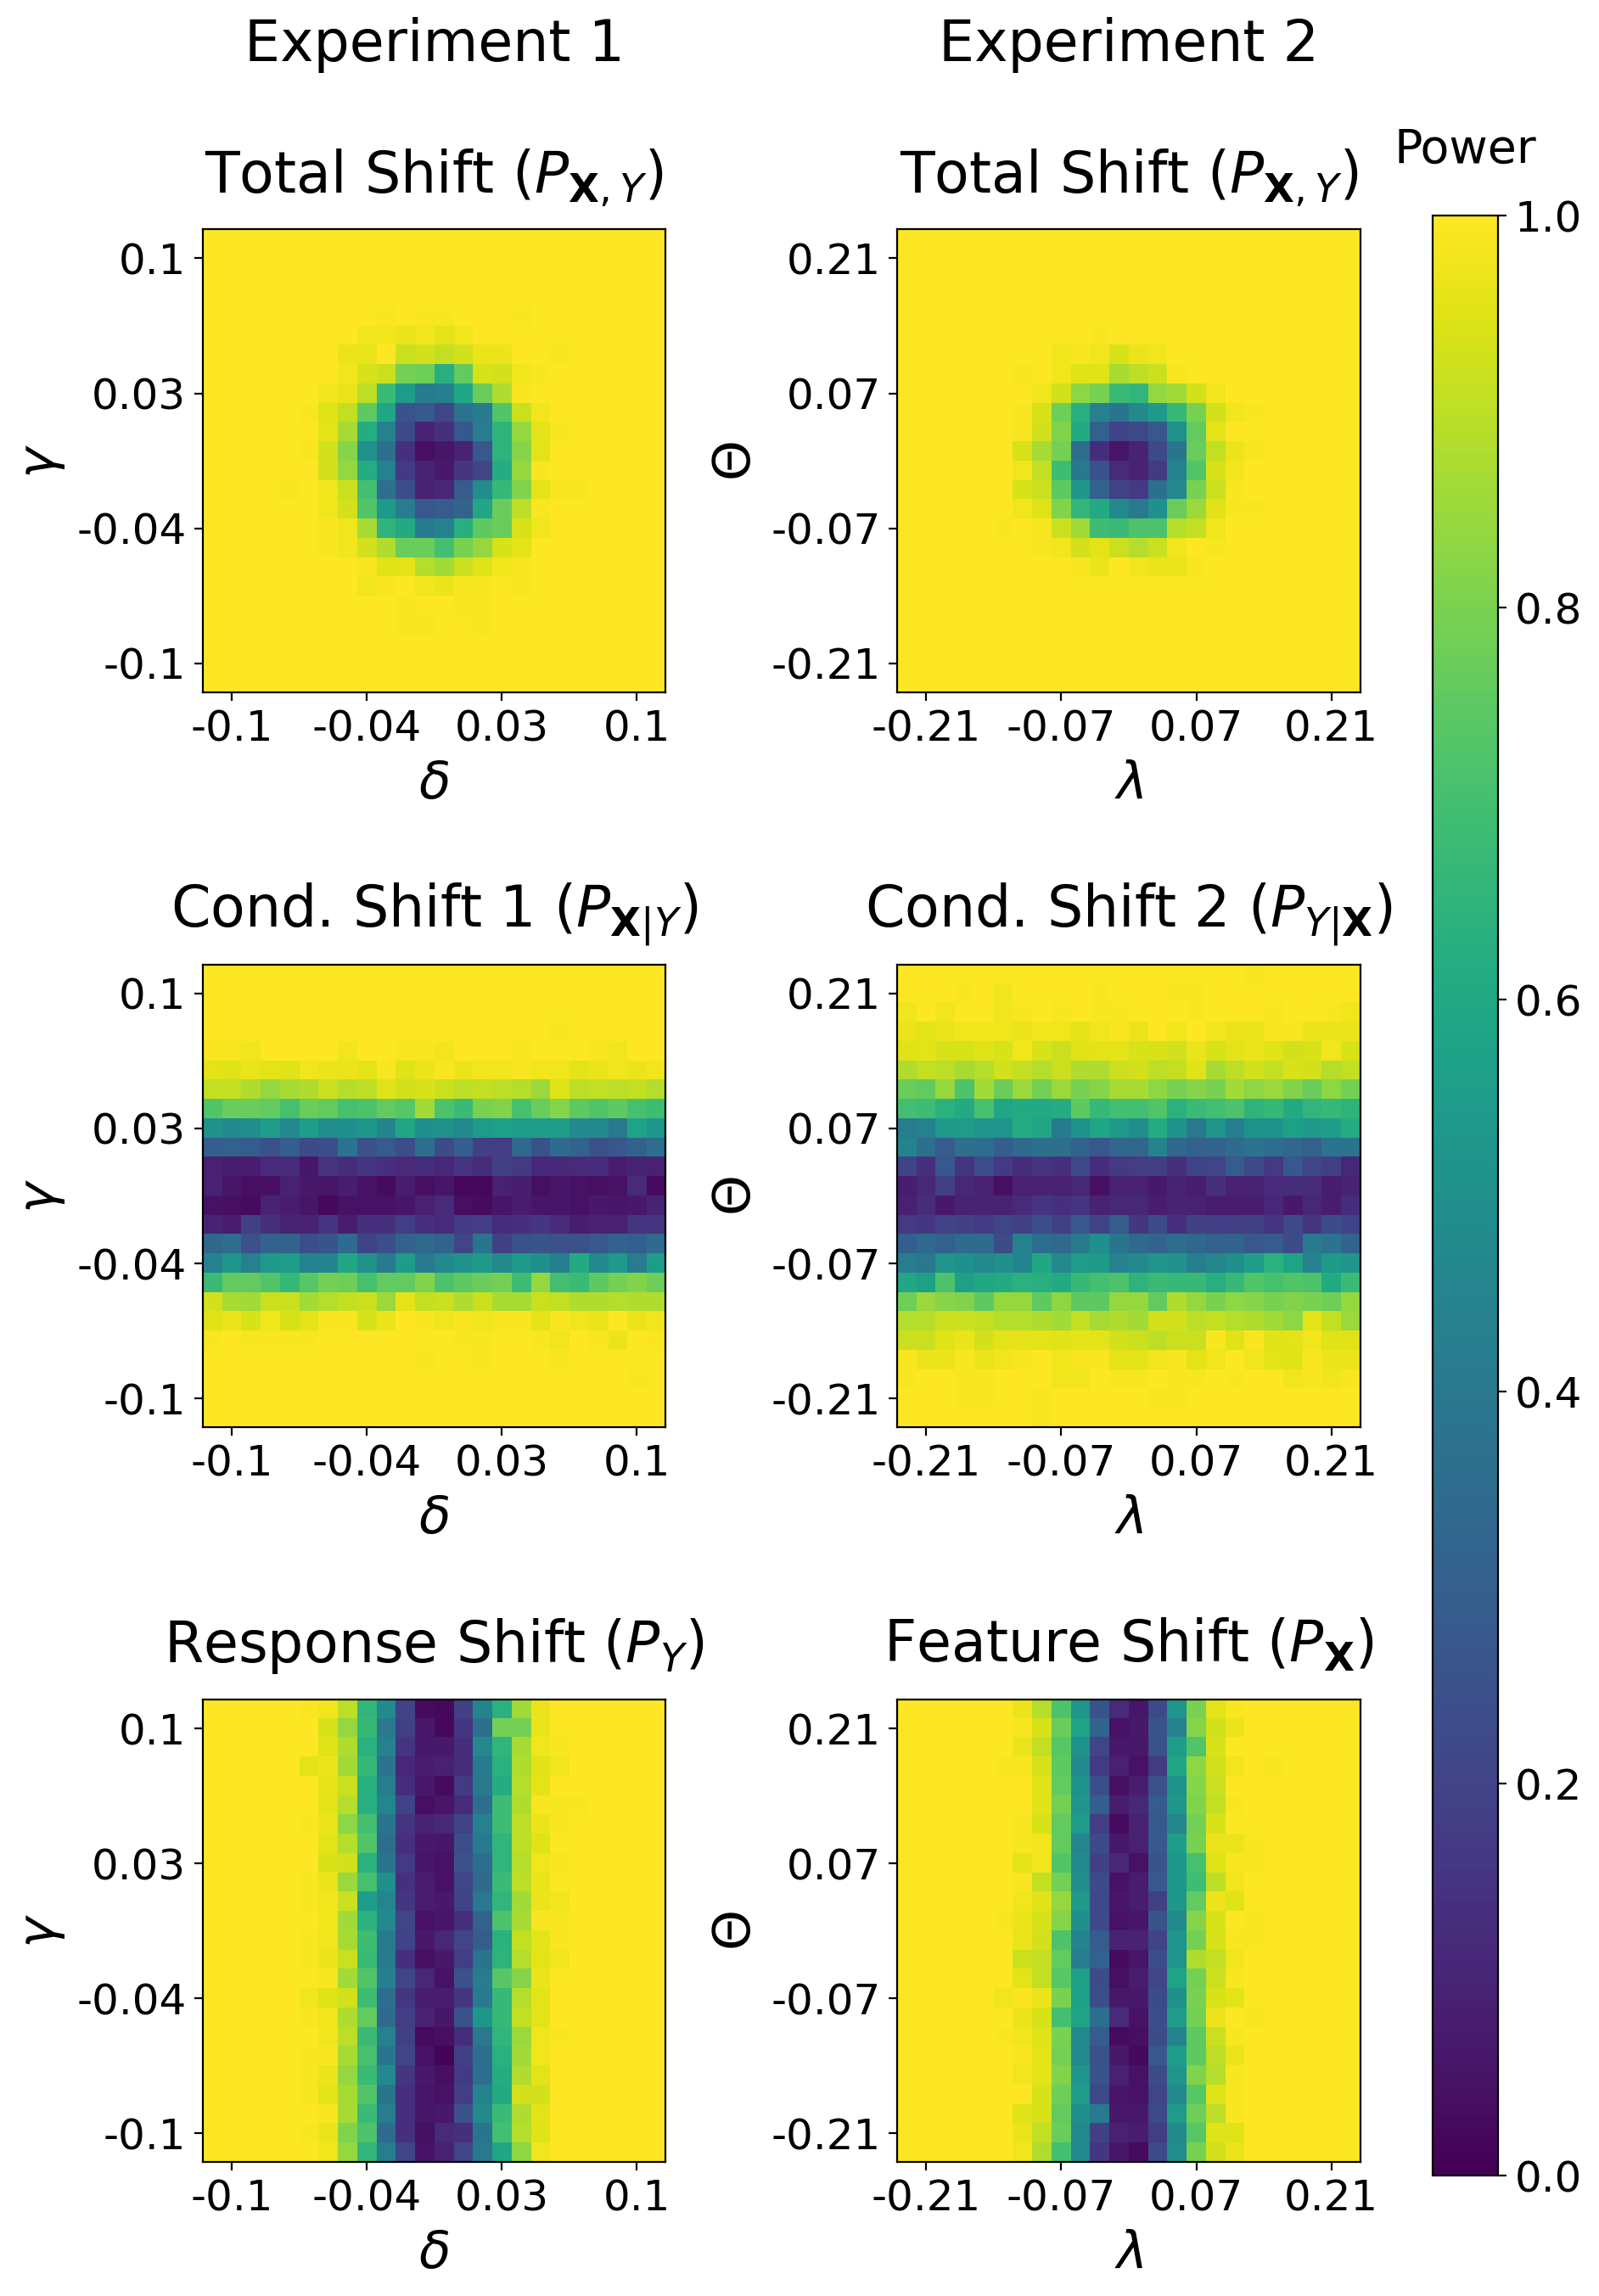

In [45]:
fig, axs = plt.subplots(3,2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Add more space between plots
#fig.tight_layout()

for i in range(3):
    for j in range(2):
        im=axs[i,j].imshow(M[j][i], cmap='viridis', vmin=0, vmax=1)
        axs[i,j].set_title(titles[j][i], size=24, y=1.05)
        axs[i,j].set_xlabel(axislab[j][0], size=22)
        axs[i,j].set_ylabel(axislab[j][1], size=22)

        ticks=[1,8,15,22]
        labels=np.round(np.array(values[j]), 3)[ticks]
        axs[i,j].set_xticks(ticks)
        axs[i,j].set_xticklabels(labels, size=18)
        axs[i,j].set_yticks(ticks)
        axs[i,j].set_yticklabels(labels[::-1], size=18)
 
cbar = fig.colorbar(im, ax=axs.ravel().tolist(),aspect=30)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_title('Power',size=20, y=1.02)

fig.set_figheight(15)
fig.set_figwidth(11)
plt.savefig('plots/power.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()